<a href="https://colab.research.google.com/github/betyavan/ML-practice/blob/main/ssd_nvidia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [2]:
precision = 'fp32'
ssd_model = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub',
                           'nvidia_ssd', model_math=precision)

/usr/local/lib/python3.7/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  "You are about to download and run code from an untrusted repository. In a future release, this won't "
Downloading: "https://github.com/NVIDIA/DeepLearningExamples/zipball/torchhub" to /root/.cache/torch/hub/torchhub.zip
/root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub/PyTorch/Classification/ConvNets/image_classification/models/common.py:14: UserWarning: p

  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [3]:
torch.hub.list('NVIDIA/DeepLearningExamples:torchhub')

Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


['nvidia_convnets_processing_utils',
 'nvidia_efficientnet',
 'nvidia_efficientnet_b0',
 'nvidia_efficientnet_b4',
 'nvidia_efficientnet_widese_b0',
 'nvidia_efficientnet_widese_b4',
 'nvidia_gpunet',
 'nvidia_resneXt',
 'nvidia_resnet50',
 'nvidia_resnext101_32x4d',
 'nvidia_se_resnext101_32x4d',
 'nvidia_ssd',
 'nvidia_ssd_processing_utils',
 'nvidia_tacotron2',
 'nvidia_tts_utils',
 'nvidia_waveglow']

In [4]:
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd_processing_utils')

Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


In [5]:
!cat /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub/hubconf.py

import os
import sys

from PyTorch.Detection.SSD.ssd import nvidia_ssd, nvidia_ssd_processing_utils
sys.path.append(os.path.join(sys.path[0], 'PyTorch/Detection/SSD'))

from PyTorch.Classification.ConvNets.image_classification.models import resnet50 as nvidia_resnet50
from PyTorch.Classification.ConvNets.image_classification.models import resnext101_32x4d as nvidia_resnext101_32x4d
from PyTorch.Classification.ConvNets.image_classification.models import se_resnext101_32x4d as nvidia_se_resnext101_32x4d
from PyTorch.Classification.ConvNets.image_classification.models import efficientnet_b0 as nvidia_efficientnet_b0
from PyTorch.Classification.ConvNets.image_classification.models import efficientnet_b4 as nvidia_efficientnet_b4
from PyTorch.Classification.ConvNets.image_classification.models import efficientnet_widese_b0 as nvidia_efficientnet_widese_b0
from PyTorch.Classification.ConvNets.image_classification.models import efficientnet_widese_b4 as nvidia_efficientnet_widese_b4
from PyTo

In [6]:
ssd_model.to('cuda')
ssd_model.eval()

SSD300(
  (feature_extractor): ResNet(
    (feature_extractor): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplac

In [7]:
uris = [
    'http://images.cocodataset.org/val2017/000000397133.jpg',
    'http://images.cocodataset.org/val2017/000000037777.jpg',
    'http://images.cocodataset.org/val2017/000000252219.jpg',
    'https://i.ibb.co/ZVqGsbJ/nvidia-image-300.jpg'
]

In [8]:
inputs = [utils.prepare_input(uri) for uri in uris]
tensor = utils.prepare_tensor(inputs, precision == 'fp16')

In [9]:
with torch.no_grad():
    detections_batch = ssd_model(tensor)

In [10]:
print(len(detections_batch))
print(len(detections_batch[0]), detections_batch[0].shape)
print(len(detections_batch[1]), detections_batch[1].shape)

2
4 torch.Size([4, 4, 8732])
4 torch.Size([4, 81, 8732])


8732 - количество боксов (из архитектуры ssd)

In [11]:
results_per_input = utils.decode_results(detections_batch)
print(len(results_per_input), len(results_per_input[0]), 
      results_per_input[1][0].shape, results_per_input[1][1].shape, results_per_input[1][2].shape)


4 3 (20, 4) (20,) (20,)


In [20]:
best_results_per_input = [utils.pick_best(results, 0.15) for results in results_per_input]
print(len(best_results_per_input), len(best_results_per_input[0]), 
      best_results_per_input[1][0].shape, best_results_per_input[1][1].shape, best_results_per_input[1][2].shape)

4 3 (11, 4) (11,) (11,)


In [13]:
classes_to_labels = utils.get_coco_object_dictionary()

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

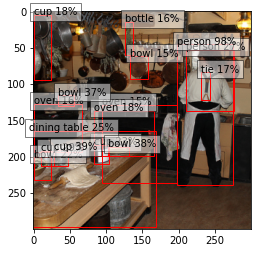

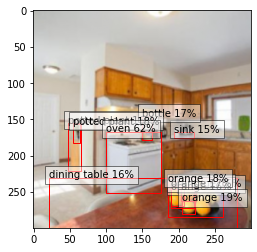

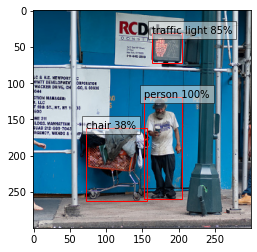

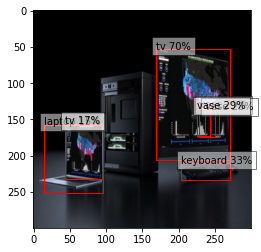

In [21]:
for image_idx in range(len(best_results_per_input)):
  fig, ax = plt.subplots(1)
  image = inputs[image_idx] /2 + 0.5 # denormilize
  ax.imshow(image)

  bboxes, classes, confidences = best_results_per_input[image_idx]
  for idx in range(len(bboxes)):
    left, bot, right, top = bboxes[idx]
    x, y, w, h = [val * 300 for val in [left, bot, right - left, top - bot]]
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.text(x, y, "{} {:.0f}%".format(classes_to_labels[classes[idx] - 1], confidences[idx]*100), bbox=dict(facecolor='white', alpha=0.5))
plt.show()